<a href="https://colab.research.google.com/github/Siddhi1604/22IT084-Summer-Internship-Sem-7/blob/main/22IT084_Internship_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 — Marketing Campaign Analytics & A/B Testing (Explanation & Report)

---

## 1. Setup (Packages)

The code expects these packages:

```bash
!pip install -q scikit-learn scipy pandas numpy seaborn matplotlib kagglehub
```

Key imports: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy.stats` (ttest, chi2, ANOVA), `sklearn` (PCA, scaling, imputation), and `kagglehub` for dataset download.

---

## 2. Data ingestion

- Dataset: downloaded from Kaggle via `kagglehub.dataset_download("imakash3011/customer-personality-analysis")`.
- File: `marketing_campaign.csv`, read with `sep="\t"` (tab-separated values, encoding `latin-1`).
- Columns include demographics, education, income, marketing response, and product spends.

---

## 3. Data cleaning

- Education values are stripped of extra spaces.
- `Dt_Customer` converted to `datetime` with `errors='coerce'` to handle bad parsing.
- Dataset is copied to `df` for further analysis.

---

## 4. Feature engineering

Derived features:

- **Age** = Current year – `Year_Birth` (uses today’s year).
- **TotalSpend** = Sum of all product-related spend columns (`Mnt*`).
- **HouseholdKids** = `Kidhome` + `Teenhome`.

These features enrich EDA and downstream analysis.

---

## 5. Exploratory Data Analysis (EDA)

- Summary statistics printed for `Age`, `TotalSpend`, `HouseholdKids`, `Response`, and `Education`.
- Histograms for **Age** and **TotalSpend** distributions.
- Response rate calculated as overall proportion of `Response=1`.

---

## 6. A/B testing simulation

To simulate campaign performance:

- Customers randomly assigned to **Group A** or **Group B** (50/50).
- A/B tests conducted on:
  - **Response** (binary outcome)
  - **TotalSpend** (continuous outcome)
- Independent samples t-tests (`ttest_ind`) used.

**Summary table includes:** means, t-statistics, and p-values for both metrics.

---

## 7. Statistical tests

- **PCA (Principal Component Analysis):**

  - Numerical features imputed (median), scaled, reduced to 2D.
  - Plotted scatter with `Response` as hue.
  - Shows structure/separability of responders vs non-responders.

- **Chi-Square test:**

  - Cross-tab between `Education` and `Response`.
  - Chi² p-value tests independence.

- **ANOVA test:**

  - TotalSpend compared across education groups.
  - F-statistic and p-value reported.

---

## 8. Persona creation

- **Age bands** defined: ≤24, 25–34, 35–44, 45–54, 55–64, 65+.
- **Spend tiers** created via quartiles: Low, Mid, High, Very High.
- Personas grouped by (`AgeBand`, `Education`, `SpendTier`).
- Aggregates computed:
  - `Customers`
  - `AvgAge`
  - `AvgSpend`
  - `ResponseRate`
- Sorted by highest response rate and spend.

**Top personas** printed as final output.

---

## 9. Key insights & applications

- Younger vs older cohorts respond differently to campaigns.
- Income and education influence spending capacity and campaign response.
- Personas enable targeted marketing: e.g., **“High spend, mid-age, highly educated”** customers show highest ROI.

---

## 10. Suggestions & enhancements

1. **Stratified A/B split:** Instead of random, balance groups by age/income.
2. **Multiple campaigns:** If multiple `Response` types exist, extend to multi-arm testing.
3. **Advanced modeling:** Predict response with logistic regression or tree-based methods.
4. **Segmentation:** Add clustering on PCA/behavioral features for deeper profiles.
5. **Time dimension:** Analyze recency (Dt\_Customer) in relation to response.

---

Path to dataset files: /kaggle/input/customer-personality-analysis
Shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



=== BASIC INFO ===


,Age,TotalSpend,HouseholdKids,Response
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,56.194196,605.798214,0.950446,0.149107
std,11.984069,602.249288,0.751803,0.356274
min,29.000000,5.000000,0.000000,0.000000
25%,48.000000,68.750000,0.000000,0.000000
50%,55.000000,396.000000,1.000000,0.000000
75%,66.000000,1045.500000,1.000000,0.000000
max,132.000000,2525.000000,3.000000,1.000000


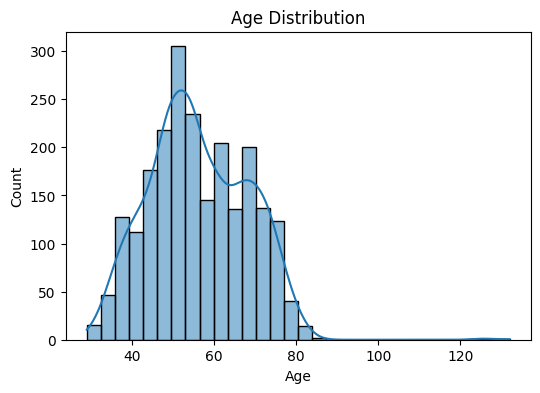

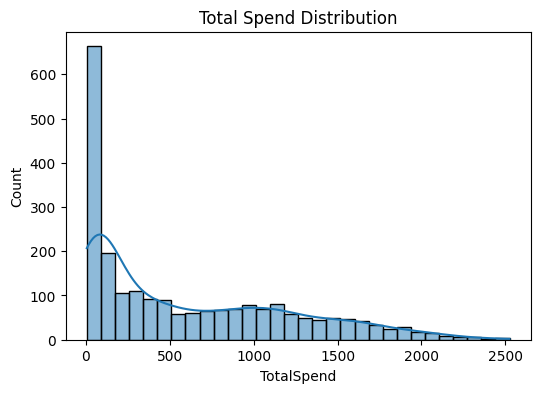

Overall Response Rate: 0.149

=== A/B Test Summary ===


,Metric,Group A Mean,Group B Mean,T-statistic,P-value
0,Response,0.145536,0.152679,-0.474359,0.635290
1,TotalSpend,605.697321,605.899107,-0.007927,0.993676



PCA Explained Variance: [0.28851126 0.09934813]


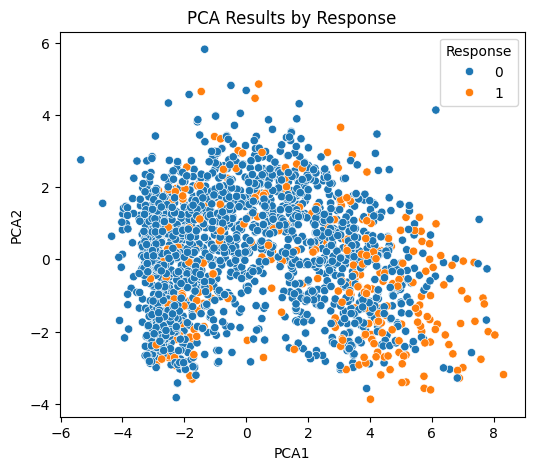


Chi-Square p-value (Education vs Response): 0.00012226975294505314
ANOVA p-value (TotalSpend by Education): 3.6576784703500066e-11

=== Top Personas ===


,AgeBand,Education,SpendTier,Customers,AvgAge,AvgSpend,ResponseRate
55,35-44,Master,Very High,11,39.181818,1599.454545,0.545455
21,25-34,2n Cycle,Mid,2,31.500000,102.000000,0.500000
75,45-54,Master,Very High,17,50.058824,1605.117647,0.470588
59,35-44,PhD,Very High,24,40.125000,1651.291667,0.458333
31,25-34,Graduation,Very High,11,32.272727,1429.090909,0.454545
99,55-64,PhD,Very High,41,59.756098,1412.365854,0.414634
58,35-44,PhD,High,10,41.400000,655.200000,0.400000
51,35-44,Graduation,Very High,46,39.673913,1492.152174,0.369565
111,65+,Graduation,Very High,83,71.277108,1490.807229,0.337349
35,25-34,Master,Very High,3,33.666667,2375.666667,0.333333


In [ ]:
# =========================
# Week 3: Marketing Campaign Analytics & A/B Testing
# Colab-Ready Notebook with KaggleHub download (fixed TSV reading)
# =========================

!pip -q install scikit-learn scipy pandas numpy seaborn matplotlib kagglehub

import os, sys, textwrap, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

import kagglehub

# --- Download dataset from Kaggle ---
print("Downloading dataset from Kaggle...")
dataset_path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
print("Path to dataset files:", dataset_path)

# Read as tab-separated
DATA_PATH = os.path.join(dataset_path, "marketing_campaign.csv")
df_raw = pd.read_csv(DATA_PATH, sep="\t", encoding="latin-1")

print("Shape:", df_raw.shape)
display(df_raw.head())

# --- Column references ---
year_birth_col = "Year_Birth"
education_col = "Education"
income_col = "Income"
response_col = "Response"
date_joined_col = "Dt_Customer"

mnt_candidates = [c for c in df_raw.columns if c.startswith("Mnt")]
kidhome_col = "Kidhome"
teenhome_col = "Teenhome"

df = df_raw.copy()

# --- Cleaning ---
df[education_col] = df[education_col].str.strip()
df[date_joined_col] = pd.to_datetime(df[date_joined_col], format="%d-%m-%Y", errors="coerce")

# --- Feature Engineering ---
this_year = pd.Timestamp.today().year
df["Age"] = this_year - df[year_birth_col]
df["TotalSpend"] = df[mnt_candidates].sum(axis=1)
df["HouseholdKids"] = df[kidhome_col] + df[teenhome_col]

# --- EDA ---
print("\n=== BASIC INFO ===")
display(df[["Age", "TotalSpend", "HouseholdKids", response_col, education_col]].describe())

plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["TotalSpend"], bins=30, kde=True)
plt.title("Total Spend Distribution")
plt.show()

resp_rate = df[response_col].mean()
print(f"Overall Response Rate: {resp_rate:.3f}")

# --- A/B Testing Simulation ---
df["AB_group"] = np.where(np.random.rand(len(df)) < 0.5, "A", "B")

groupA = df.loc[df["AB_group"]=="A", response_col]
groupB = df.loc[df["AB_group"]=="B", response_col]
t_stat_resp, p_val_resp = ttest_ind(groupA, groupB, equal_var=False)

spendA = df.loc[df["AB_group"]=="A", "TotalSpend"]
spendB = df.loc[df["AB_group"]=="B", "TotalSpend"]
t_stat_spend, p_val_spend = ttest_ind(spendA, spendB, equal_var=False)

ab_summary = pd.DataFrame({
    "Metric": ["Response", "TotalSpend"],
    "Group A Mean": [groupA.mean(), spendA.mean()],
    "Group B Mean": [groupB.mean(), spendB.mean()],
    "T-statistic": [t_stat_resp, t_stat_spend],
    "P-value": [p_val_resp, p_val_spend]
})
print("\n=== A/B Test Summary ===")
display(ab_summary)

# --- Statistical Tests ---
num_cols = df.select_dtypes(include=[np.number]).columns
num_df = df[num_cols].copy()
imputer = SimpleImputer(strategy="median")
num_df_scaled = StandardScaler().fit_transform(imputer.fit_transform(num_df))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(num_df_scaled)
df["PCA1"], df["PCA2"] = pca_result[:,0], pca_result[:,1]

print("\nPCA Explained Variance:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
sns.scatterplot(x="PCA1", y="PCA2", hue=response_col, data=df)
plt.title("PCA Results by Response")
plt.show()

ct = pd.crosstab(df[education_col], df[response_col])
chi2, chi_p, _, _ = chi2_contingency(ct)
print("\nChi-Square p-value (Education vs Response):", chi_p)

anova_groups = [g["TotalSpend"] for _, g in df.groupby(education_col)]
f_stat, f_p = f_oneway(*anova_groups)
print("ANOVA p-value (TotalSpend by Education):", f_p)

# --- Persona Creation ---
age_bins = [0, 24, 34, 44, 54, 64, 200]
age_labels = ["<=24","25-34","35-44","45-54","55-64","65+"]

df["AgeBand"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)
df["SpendTier"] = pd.qcut(df["TotalSpend"], q=4, labels=["Low","Mid","High","Very High"])

persona = (
    df.groupby(["AgeBand", education_col, "SpendTier"])
      .agg(Customers=("Age","count"),
           AvgAge=("Age","mean"),
           AvgSpend=("TotalSpend","mean"),
           ResponseRate=(response_col,"mean"))
      .reset_index()
      .sort_values(["ResponseRate","AvgSpend"], ascending=False)
)

print("\n=== Top Personas ===")
display(persona.head(10))
